In [14]:
import pandas as pd
import os
import json
from scipy.io import wavfile
import glob
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import Audio
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cough_data.csv')
df.head()

,cough_detected,age,is_female,is_male,COVID-19,symptomatic,season_autumn,season_spring,season_summer,Africa,Asia,Europe,North America,Oceania,South America,file_path,wav_file_name
0,0.6911,31,1,0,0,1,0,1,0,0,0,1,0,0,0,C:\Users\drake\Documents\DL Machine Learning C...,00432f00-2477-4faf-a440-cc1276065b4a.wav
1,0.9751,44,0,1,0,1,0,1,0,0,0,1,0,0,0,C:\Users\drake\Documents\DL Machine Learning C...,008c1c9e-aeef-40c5-846c-24f1b964f884.wav
2,0.9775,17,0,1,0,1,1,0,0,0,0,1,0,0,0,C:\Users\drake\Documents\DL Machine Learning C...,00ac8cb0-3384-46b2-9db5-5b5e911615f0.wav
3,0.9900,41,1,0,0,1,0,1,0,0,0,0,0,0,1,C:\Users\drake\Documents\DL Machine Learning C...,00ce5b06-c302-4387-bbd7-86355a4a8c12.wav
4,0.9632,39,1,0,1,0,1,0,0,0,0,1,0,0,0,C:\Users\drake\Documents\DL Machine Learning C...,01424527-9c3b-4b6e-96f1-9eea3150819b.wav


In [3]:
#For log regression I wont need these columns
df.drop(['symptomatic','file_path','wav_file_name'], axis=1, inplace=True)
df.head(1)

,cough_detected,age,is_female,is_male,COVID-19,season_autumn,season_spring,season_summer,Africa,Asia,Europe,North America,Oceania,South America
0,0.6911,31,1,0,0,0,1,0,0,0,1,0,0,0


In [4]:
df['COVID-19'].value_counts()

0    1524
1     620
Name: COVID-19, dtype: int64

In [5]:
# setting up features and target variable
X = df.drop('COVID-19',axis=1)
y = df['COVID-19']

In [6]:
# I am going to oversample my covid 19 data since there is such a big difference
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)

In [7]:
y_resampled.value_counts()

0    1524
1    1524
Name: COVID-19, dtype: int64

In [8]:
# right now I am just going to do a normal train test split
from sklearn.model_selection import train_test_split

In [9]:
x_train_and_val, x_test, y_train_and_val, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state=42)

In [10]:
print(x_train_and_val.shape)
print(x_test.shape)
print(y_train_and_val.shape)
print(y_test.shape)

(2438, 13)
(610, 13)
(2438,)
(610,)


In [11]:
# set up k-fold cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [12]:
# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
support_list = []

Fold 0:
  Train: index=[   0    1    2 ... 2434 2436 2437]
  Test:  index=[  18   25   29   43   44   48   49   51   56   67   69   70   73   76
   84   93   96  100  109  111  124  128  134  135  149  157  163  168
  170  173  174  178  179  188  192  196  199  208  210  211  212  218
  219  220  229  231  233  237  239  240  246  247  251  252  254  259
  279  282  289  290  291  296  299  303  307  321  324  332  340  342
  350  353  354  361  367  368  383  387  402  407  408  410  414  416
  420  422  430  432  433  435  438  440  443  445  450  457  461  463
  464  471  472  478  479  480  482  485  486  495  497  507  508  509
  518  521  522  527  528  530  532  544  554  555  564  575  581  582
  596  598  599  602  607  610  611  613  617  620  621  629  630  632
  636  643  647  649  668  670  672  678  693  694  700  705  707  719
  729  733  736  741  755  756  765  767  781  782  785  788  789  800
  801  802  807  808  809  810  817  819  829  831  834  836  838  839
  8

Fold 3:
  Train: index=[   1    2    4 ... 2435 2436 2437]
  Test:  index=[   0    3    5    7    9   24   27   28   33   38   40   42   47   52
   55   57   60   62   66   68   74   75   77   79   80   82   85   90
   92   94   97  102  104  106  108  110  117  125  132  133  137  143
  144  145  165  166  169  172  176  183  193  204  213  223  227  228
  232  234  235  238  242  248  249  255  264  267  276  280  302  314
  336  338  345  347  349  357  359  362  364  372  373  384  386  388
  389  395  404  424  434  437  444  446  448  449  454  460  467  470
  473  475  484  491  499  501  503  504  510  517  523  525  533  536
  539  541  542  545  547  568  573  577  587  594  603  612  622  624
  638  644  645  652  655  657  661  665  666  667  671  673  676  688
  691  697  708  713  714  716  717  718  725  731  732  734  735  737
  739  749  750  751  758  762  770  783  793  794  796  803  805  811
  814  822  823  826  828  842  846  847  850  852  858  868  875  882
  8

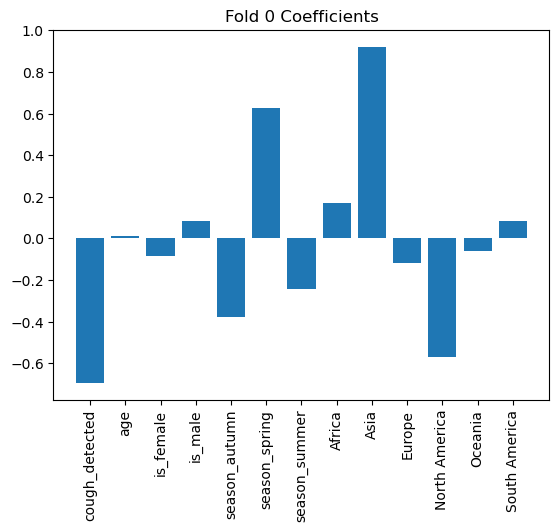

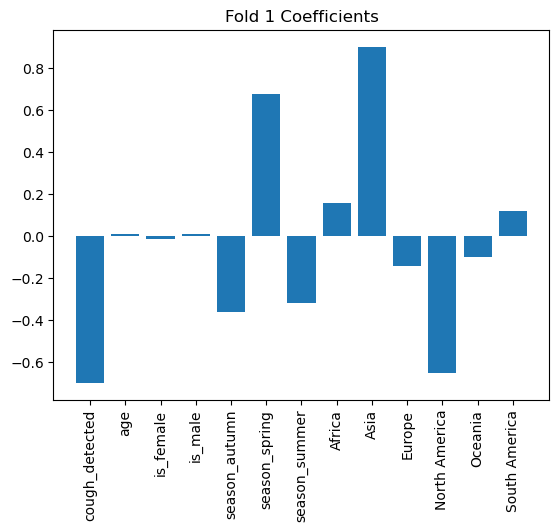

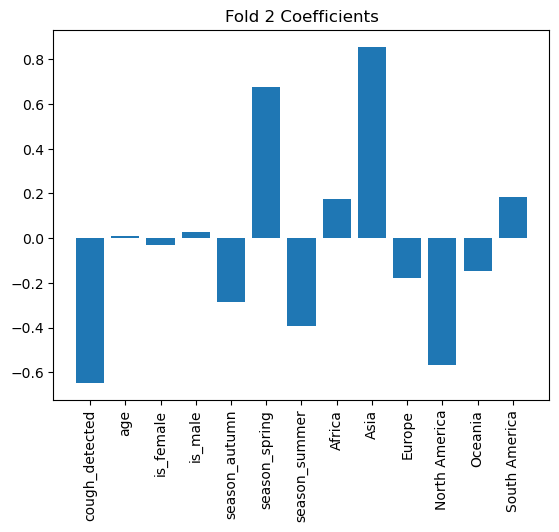

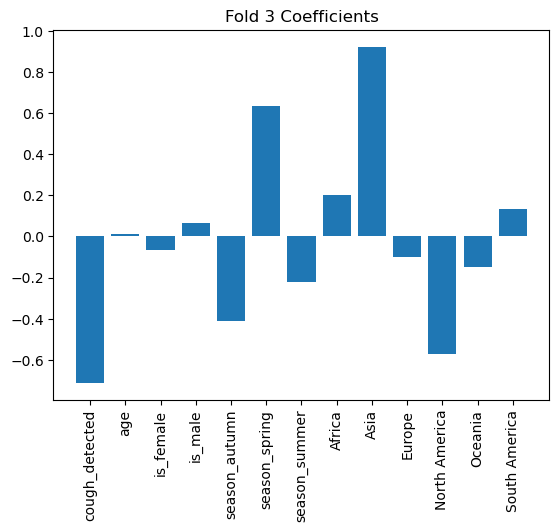

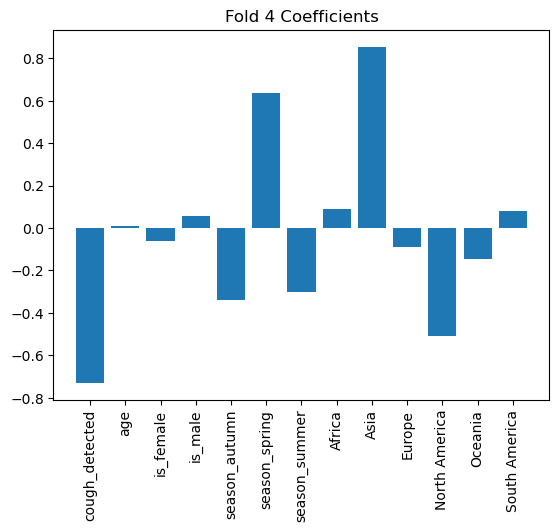

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_selection import f_regression

# Loop over each fold
for i, (train_index, test_index) in enumerate(kf.split(x_train_and_val)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_train, X_test = x_train_and_val.iloc[train_index], x_train_and_val.iloc[test_index]
    Y_train, Y_test = y_train_and_val.iloc[train_index], y_train_and_val.iloc[test_index]

    # Perform logistic regression
    logreg = LogisticRegression(penalty='l2',max_iter=10000, class_weight='balanced', C=0.1, random_state=42)
    logreg.fit(X_train, Y_train)
    X_train_df = pd.DataFrame(X_train)
    print(X_train_df)
    y_train_df = pd.DataFrame(Y_train)
    print(y_train_df.shape)
    kfold_result_df = X_train_df.merge(y_train_df, how='left', left_index=True, right_index=True)
    Y_pred = logreg.predict(X_test)

    # Calculate evaluation metrics on fold
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print("  Accuracy:", accuracy)
    print(classification_report(Y_test,Y_pred))

    # Calculate p-values using fregression aqnd coefficients
    coefficients = pd.DataFrame(pd.Series(logreg.coef_[0], index=X_train_df.columns))
    _, p_values = f_regression(X_train, Y_train)
    p_values = pd.DataFrame(pd.Series(p_values, index=X_train_df.columns))
    
    # Plot coefficients
    plt.figure()
    plt.bar(X_train_df.columns, logreg.coef_[0])
    plt.xticks(rotation=90)
    plt.title(f"Fold {i} Coefficients")
    


In [18]:
print('Actual Test:')
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("  Accuracy:", accuracy)
print("  Precision:", precision)
print("  Recall:", recall)
print("  F1 Score:", f1)

Actual Test:
  Accuracy: 0.6196721311475409
  Precision: 0.6012658227848101
  Recall: 0.6418918918918919
  F1 Score: 0.6209150326797386


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       314
           1       0.60      0.64      0.62       296

    accuracy                           0.62       610
   macro avg       0.62      0.62      0.62       610
weighted avg       0.62      0.62      0.62       610



In [21]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.6203090032707868


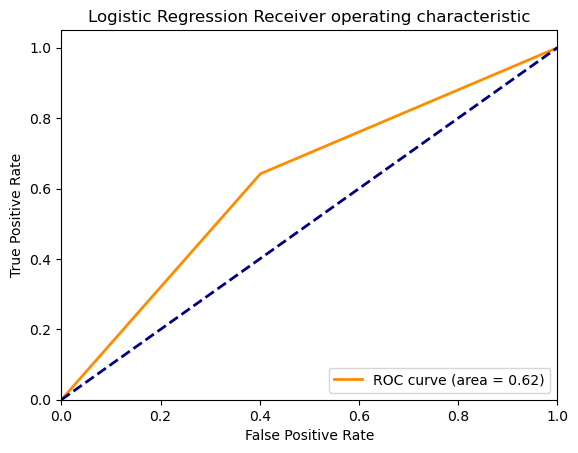

In [28]:
# auc roc graph
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [22]:
# Construct a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[188 126]
 [106 190]]


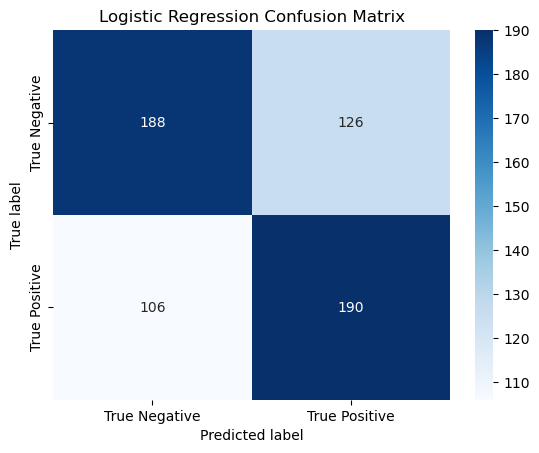

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
cm = np.array([[188, 126], [106, 190]])

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True Negative', 'True Positive'], yticklabels=['True Negative', 'True Positive'])

# Set the axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Logistic Regression Confusion Matrix')

# Display the plot
plt.show()


In [26]:
# Calculate p-values using f_regression
_, p_values = f_regression(X_test, Y_test)

# Print out p-values
for i, p_value in enumerate(p_values):
    print(f"Feature {i+1}: p-value={p_value:.4f}")


Feature 1: p-value=0.0142
Feature 2: p-value=0.4530
Feature 3: p-value=0.7285
Feature 4: p-value=0.7285
Feature 5: p-value=0.0000
Feature 6: p-value=0.0000
Feature 7: p-value=0.0445
Feature 8: p-value=0.3339
Feature 9: p-value=0.0000
Feature 10: p-value=0.0000
Feature 11: p-value=0.0001
Feature 12: p-value=1.0000
Feature 13: p-value=0.4196


These p-values indicate the statistical significance of each feature in predicting the target variable. The null hypothesis for each feature is that it has no effect on the target variable, and the alternative hypothesis is that it does have an effect.

A p-value less than 0.05 is generally considered statistically significant, which means that we can reject the null hypothesis and conclude that the feature is important in predicting the target variable.

From the example you provided, we can see that features 1, 5, 6, 9, 10, and 11 have p-values less than 0.05, which means that they are statistically significant in predicting the target variable. Features 2, 3, 4, 7, 8, 12, and 13 have p-values greater than 0.05, which means that we cannot reject the null hypothesis that they have no effect on the target variable.

Therefore, we can focus on the statistically significant features (i.e., features 1, 5, 6, 9, 10, and 11) for further analysis and modeling.

In [44]:
df.head(1)

,cough_detected,age,is_female,is_male,COVID-19,season_autumn,season_spring,season_summer,Africa,Asia,Europe,North America,Oceania,South America
0,0.6911,31,1,0,0,0,1,0,0,0,1,0,0,0


Features 1,5,6,9,10, and 11 are statistically significant in predecting the target varible (COVID-19)
Feature 1: cough_detected,
Feature 5: season_autumn,
Feature 6: season_spring,
Feature 9: Asia,
Feature 10: Europe,
Feature 11: North America